# Machine Learning Example with IRIS dataset

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

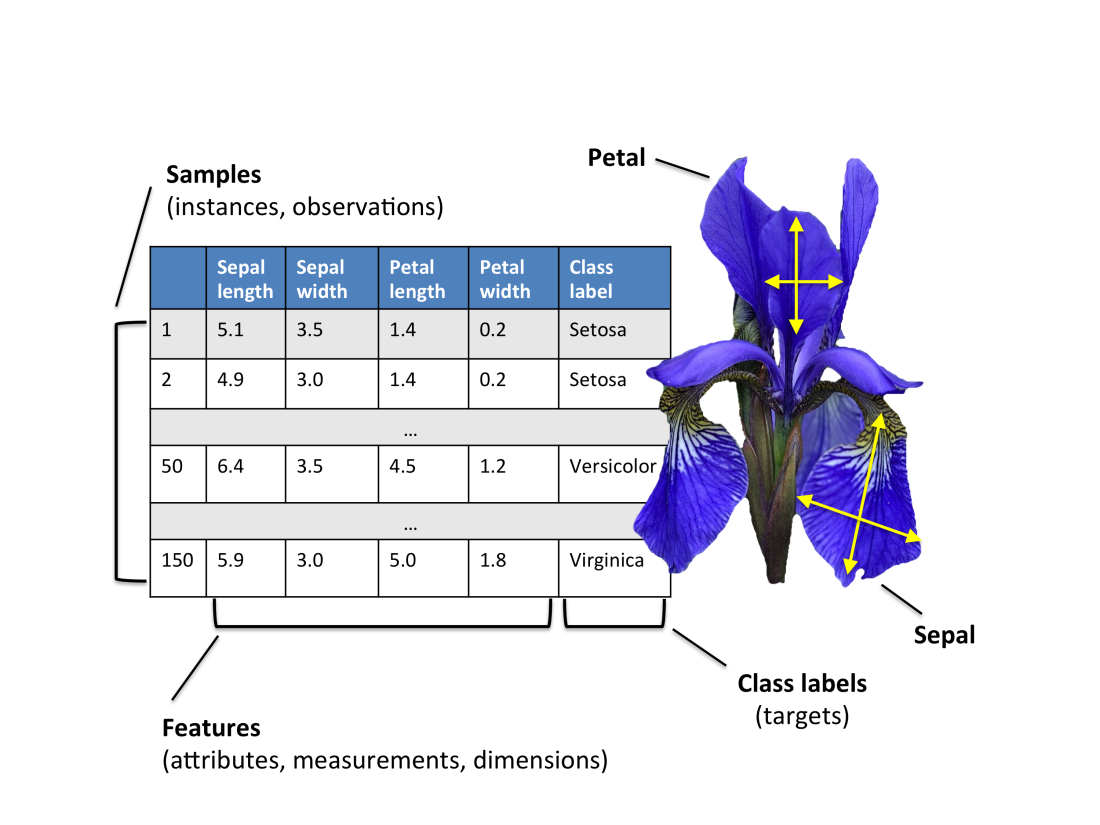

In [1]:
from IPython.display import Image
Image(filename="pic/0_SHhnoaaIm36pc1bd.png")

## Dataset Loading

In [2]:
import numpy as np
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#url = 'iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing

### Divide the dataset into a feature set and corresponding labels

In [3]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

### Divide data into training and test sets 

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize/Normalize/Scale the feature set

For decision tree and decision tree based algorithms, feature normalization is unnecessary.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Training on the training dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

## Predicting on the test dataset

In [14]:
y_pred = classifier.predict(X_test)

## Performance Evaluation

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy:  1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



---

## Extra: Checking Feature Importance

In [16]:
print(classifier.feature_importances_)

[0.10859763 0.01080224 0.42566404 0.4549361 ]


## Extra: Try with 30% test data and 70% training data

# Save Your Model with Pickle

`Pickle` is the standard way of serializing objects in Python.

You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file.

Later you can load this file to deserialize your model and use it to make new predictions.

In [10]:
import pickle

# Save the model to disk
modelname = 'data/randomforest_model.sav'
pickle.dump(classifier, open(modelname, 'wb'))

In [11]:
# Load the model from disk
loaded_model = pickle.load(open(modelname, 'rb'))
y_pred = loaded_model.predict(X_test_std)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']
